In [3]:
import numpy as np
import scipy.io
import os
import cv2
import math
import matplotlib.pyplot as plt
import sklearn
import h5py
from scipy.io import loadmat
# import data_preprocessing
# from data_preprocessing import extract_single_frame_from_displacementNorm
# from data_preprocessing import process_one_patient
# from data_preprocessing import process_one_file

In [2]:
# data_dir = "/DATA/TBI/jesseDATA"
# data_dir = "/DATA/TBI/phan92DATA/tbi_diagnosis/data/raw/cardiac_displacement_3_updated_Oct13"

In [3]:
# mat = scipy.io.loadmat('/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat')

In [4]:
# mat.keys()
# # mat.values()
# x = mat.items()
# print(x)
# print(mat['displacementNorm'])

In [5]:
# patient_1 = process_one_patient("/DATA/TBI/jesseDATA/DoD001", 256, 256, 1)
# print(patient_1[0])
# print(patient_1[1])
# print(patient_1[2])
# print(patient_1[3])
# type(patient_1)
# len(patient_1)
# type(patient_1[0])
# len(patient_1[0])
# type(patient_1[0][0])
# len(patient_1[0][0])
# print(patient_1[0][0])
# print(patient_1[0][0][0])
# frame_list = []
# for i in range(0, 29):
#     frame_list.append(np.average(patient_1[0][i]))
#     print(frame_list)
# max(frame_list)
# frame_list.index(1.1102230246251565e-16)
# np.argmax(frame_list)

In [6]:
def find_max_displacement(filepath, cardiac_cycle=0):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_list = []
    for i in range(0, 29):
        disp_avg_list.append(np.average(displace_data[:, :, i]))
    # print(disp_avg_list)
    
    print("max displacement averaged:")
    print(max(disp_avg_list)) # disp_avg_list.index()
    print("max displacement frame:")
    print(np.argmax(disp_avg_list))
    
    plt.plot(disp_avg_list)

(259, 80, 30, 9)
max displacement averaged:
0.0021829680170182353
max displacement frame:
25


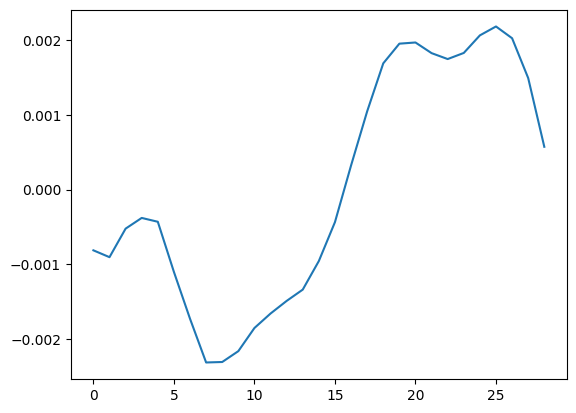

In [7]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.006503995219521169
max displacement frame:
0


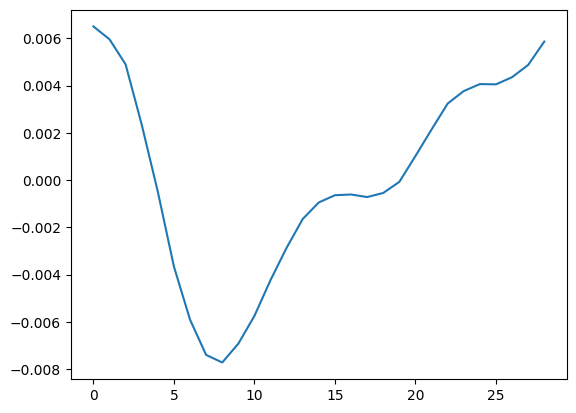

In [8]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.00557190393743238
max displacement frame:
0


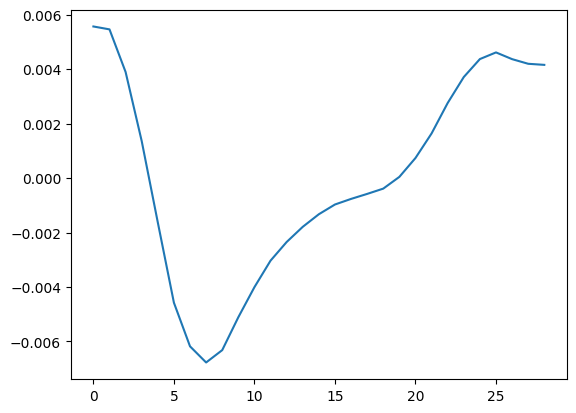

In [9]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter003_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 8)
max displacement averaged:
0.002412422742796683
max displacement frame:
23


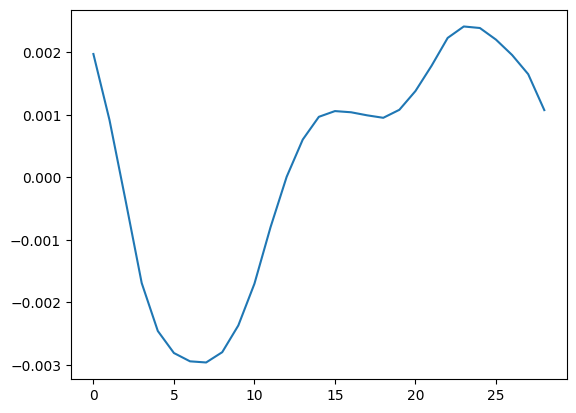

In [11]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.0021051533108477492
max displacement frame:
28


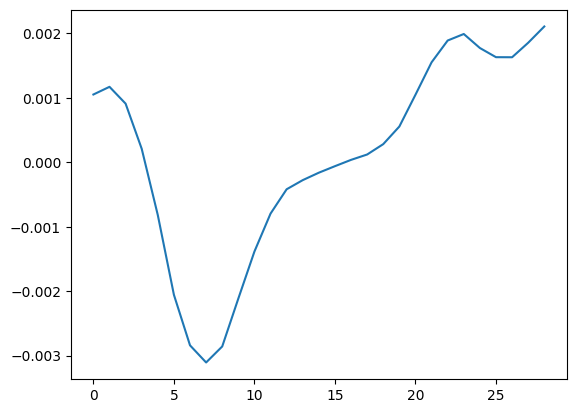

In [12]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter016_LA1_Displacement_Normalized_3.mat")

(259, 80, 30, 10)
max displacement averaged:
0.0028479556305832077
max displacement frame:
0


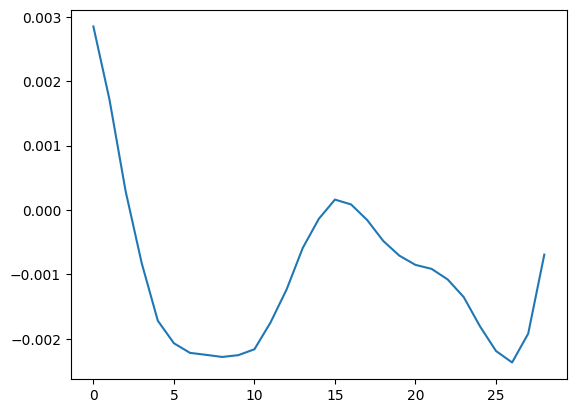

In [13]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged:
0.0033083015852944098
max displacement frame:
0


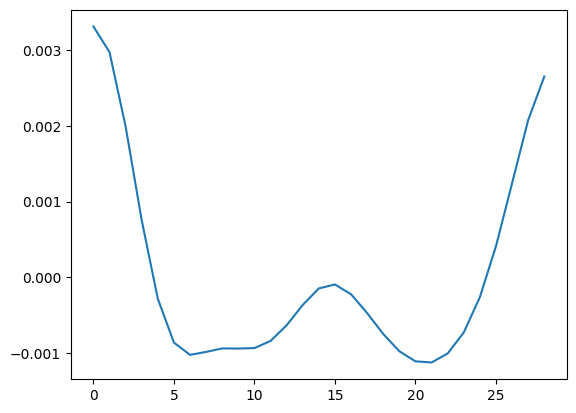

In [14]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter003_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged:
0.0012439519302294302
max displacement frame:
9


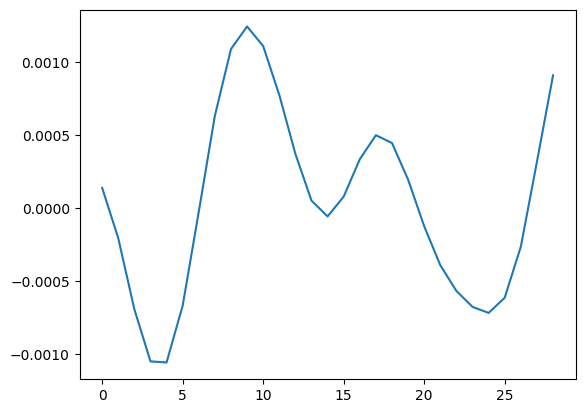

In [15]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged:
0.001258290314350984
max displacement frame:
28


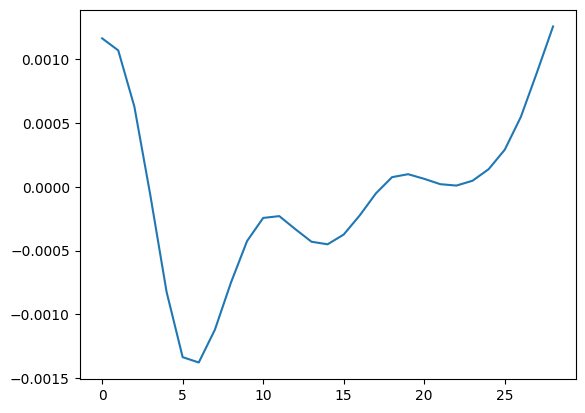

In [16]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter001_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 6)
max displacement averaged:
0.0010735402027338462
max displacement frame:
25


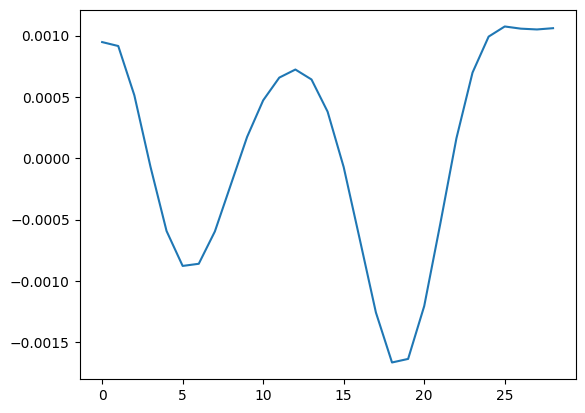

In [17]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged:
0.0015172298193485716
max displacement frame:
4


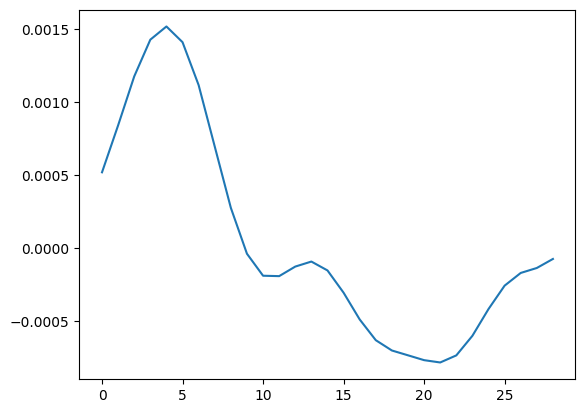

In [18]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter019_LA2_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged:
0.0007288231226085771
max displacement frame:
1


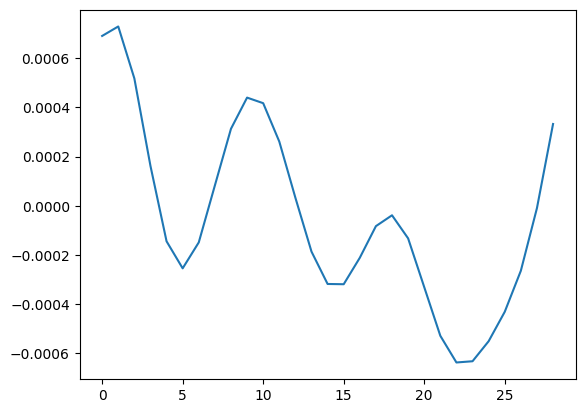

In [19]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter018_LO1_Displacement_Normalized_3.mat")

In [16]:
def find_max_displacement_quadrants(filepath, cardiac_cycle=0):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_first = []
    disp_avg_second = []
    disp_avg_third = []
    disp_avg_fourth = []
    for i in range(0, 29):
        disp_avg_first.append(np.average(displace_data[0:129, 0:40, i]))
        disp_avg_second.append(np.average(displace_data[0:129, 41:79, i]))
        disp_avg_third.append(np.average(displace_data[130:249, 0:40, i]))
        disp_avg_fourth.append(np.average(displace_data[130:249, 41:79, i]))
    
    print("max displacement averaged first quadrant:")
    print(max(disp_avg_first))
    print("max displacement frame first quadrant:")
    print(np.argmax(disp_avg_first))
        
    print("max displacement averaged second quadrant:")
    print(max(disp_avg_second))
    print("max displacement frame second quadrant:")
    print(np.argmax(disp_avg_second))
    
    print("max displacement averaged third quadrant:")
    print(max(disp_avg_third))
    print("max displacement frame third quadrant:")
    print(np.argmax(disp_avg_third))
    
    print("max displacement averaged fourth quadrant:")
    print(max(disp_avg_fourth))
    print("max displacement frame fourth quadrant:")
    print(np.argmax(disp_avg_fourth))

In [17]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged first quadrant:
0.00633505864879237
max displacement frame first quadrant:
27
max displacement averaged second quadrant:
0.0029798977598131295
max displacement frame second quadrant:
26
max displacement averaged third quadrant:
0.0031181723545328456
max displacement frame third quadrant:
3
max displacement averaged fourth quadrant:
0.004243926617745218
max displacement frame fourth quadrant:
18


In [18]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged first quadrant:
0.00638336333231672
max displacement frame first quadrant:
2
max displacement averaged second quadrant:
0.0010735582056745976
max displacement frame second quadrant:
4
max displacement averaged third quadrant:
0.011844433245673747
max displacement frame third quadrant:
0
max displacement averaged fourth quadrant:
0.00828989205335948
max displacement frame fourth quadrant:
28


In [19]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter003_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged first quadrant:
0.0067674427545763695
max displacement frame first quadrant:
4
max displacement averaged second quadrant:
0.006218594202487075
max displacement frame second quadrant:
2
max displacement averaged third quadrant:
0.011085391033094935
max displacement frame third quadrant:
0
max displacement averaged fourth quadrant:
0.007677783198770393
max displacement frame fourth quadrant:
24


In [22]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 8)
max displacement averaged first quadrant:
0.00919884103839247
max displacement frame first quadrant:
27
max displacement averaged second quadrant:
0.006864471350825007
max displacement frame second quadrant:
25
max displacement averaged third quadrant:
0.0057144105058815065
max displacement frame third quadrant:
10
max displacement averaged fourth quadrant:
0.004129965662908032
max displacement frame fourth quadrant:
14


In [24]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter016_LA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged first quadrant:
0.001798287956296371
max displacement frame first quadrant:
23
max displacement averaged second quadrant:
0.0068126066734291455
max displacement frame second quadrant:
2
max displacement averaged third quadrant:
0.003324178271944274
max displacement frame third quadrant:
28
max displacement averaged fourth quadrant:
0.0023707896888517997
max displacement frame fourth quadrant:
16


In [25]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 80, 30, 10)
max displacement averaged first quadrant:
0.009079837129237066
max displacement frame first quadrant:
0
max displacement averaged second quadrant:
0.007650110834236564
max displacement frame second quadrant:
0
max displacement averaged third quadrant:
0.0020786190527465657
max displacement frame third quadrant:
10
max displacement averaged fourth quadrant:
0.004279001375029693
max displacement frame fourth quadrant:
14


In [27]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter003_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged first quadrant:
0.010578525357439883
max displacement frame first quadrant:
0
max displacement averaged second quadrant:
0.00781727626601884
max displacement frame second quadrant:
0
max displacement averaged third quadrant:
0.010188488351189856
max displacement frame third quadrant:
7
max displacement averaged fourth quadrant:
0.00585784498150002
max displacement frame fourth quadrant:
0


In [28]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged first quadrant:
0.009571153634081385
max displacement frame first quadrant:
28
max displacement averaged second quadrant:
0.007136607948672126
max displacement frame second quadrant:
28
max displacement averaged third quadrant:
0.0077346201787532615
max displacement frame third quadrant:
8
max displacement averaged fourth quadrant:
0.005702718214966518
max displacement frame fourth quadrant:
7


In [29]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter001_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged first quadrant:
0.0036205749237963668
max displacement frame first quadrant:
1
max displacement averaged second quadrant:
0.003946128472292435
max displacement frame second quadrant:
28
max displacement averaged third quadrant:
0.0035934800553940865
max displacement frame third quadrant:
8
max displacement averaged fourth quadrant:
0.004623609890371295
max displacement frame fourth quadrant:
0


In [31]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 6)
max displacement averaged first quadrant:
0.005300049492899794
max displacement frame first quadrant:
28
max displacement averaged second quadrant:
0.0021768803190287734
max displacement frame second quadrant:
28
max displacement averaged third quadrant:
0.00385622240268252
max displacement frame third quadrant:
9
max displacement averaged fourth quadrant:
0.002455031424175754
max displacement frame fourth quadrant:
0


In [32]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter019_LA2_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged first quadrant:
0.00402530643603869
max displacement frame first quadrant:
24
max displacement averaged second quadrant:
0.007678423024290981
max displacement frame second quadrant:
23
max displacement averaged third quadrant:
0.007874819590085173
max displacement frame third quadrant:
4
max displacement averaged fourth quadrant:
0.00869039155514858
max displacement frame fourth quadrant:
4


In [33]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement averaged first quadrant:
0.0019072120469978478
max displacement frame first quadrant:
18
max displacement averaged second quadrant:
0.001824361878047226
max displacement frame second quadrant:
0
max displacement averaged third quadrant:
0.004283737458867488
max displacement frame third quadrant:
9
max displacement averaged fourth quadrant:
0.0070712822494450375
max displacement frame fourth quadrant:
0
